In [2]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

In [3]:
# Paramètres des deux distributions bêta
alpha1, beta1 = 2, 5
alpha2, beta2 = 3, 4

# Création de l'échantillon des valeurs
x = np.linspace(0, 1, 1000)

# Calcul des PDF des deux distributions bêta
pdf1 = beta.pdf(x, alpha1, beta1)
pdf2 = beta.pdf(x, alpha2, beta2)

# Calcul de la probabilité de recouvrement
overlap_prob = np.trapz(np.minimum(pdf1, pdf2), x)

print("Probabilité de recouvrement entre les deux distributions bêta :", overlap_prob)


Probabilité de recouvrement entre les deux distributions bêta : 0.6707826352275587


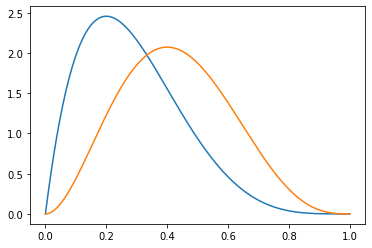

In [4]:
plt.plot(x, pdf1)
plt.plot(x, pdf2)


## Implication : A--> B et A --> non-B 

In [5]:
# (A,B) observations
data = ((0,1), (1,0), (0,0), (1,1), (1,1), (1,1), (0,1), (0,0), (1,1), (1,1))
#data = ((1,1), (1,1), (1,1), (1,1), (1,1), (1,1), (1,1))

In [6]:
def simple_implication(data):
    H0 = ((0,0), (0,1), (1,0))
    #H0 = ((1,0)) #non : A --> B
    H1 = ((0,0), (0,1), (1,1)) # A --> nB
    beta_ = {'H0':[1,1], 'H1':[1,1]}
    for i, obs in enumerate(data):
        if obs in H0:
            beta_['H0'][0] += 1
        else:
            beta_['H0'][1] += 1
        if obs in H1:
            beta_['H1'][0] += 1
        else:
            beta_['H1'][1] += 1
        pdf_H0 = beta.pdf(x, beta_['H0'][0], beta_['H0'][1])
        pdf_H1 = beta.pdf(x, beta_['H1'][0], beta_['H1'][1])
        plt.figure(figsize=(4,3))
        plt.plot(x, pdf_H0, label=r'H0: $A \rightarrow \neg B$')
        plt.plot(x, pdf_H1, label=r'H1: $A \rightarrow B$')
        overlap_surface = np.minimum(pdf_H0, pdf_H1)
        overlap_prob = np.trapz(np.minimum(pdf_H0, pdf_H1), x)
        plt.fill_between(x, np.zeros_like(overlap_surface), overlap_surface, color='tab:red', alpha=.2)
        plt.title(f'Observation #{i+1}: {obs}, overlap={overlap_prob:.2f}')
        plt.legend()

    

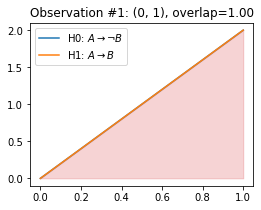

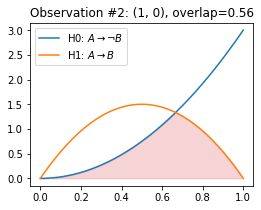

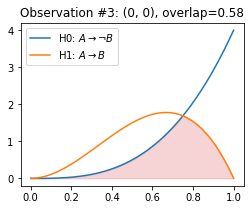

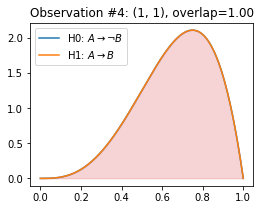

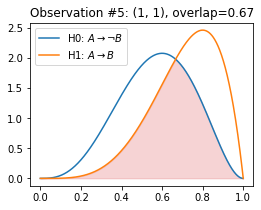

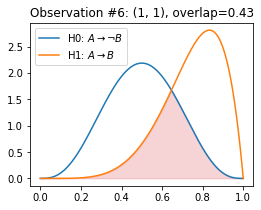

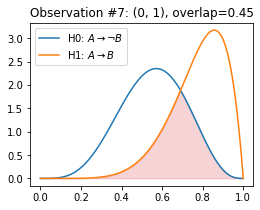

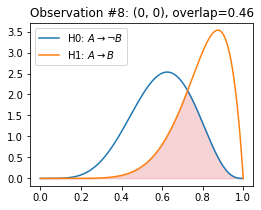

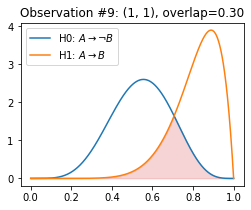

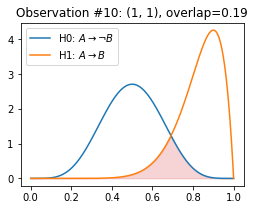

In [7]:
simple_implication(data)

### Baseline

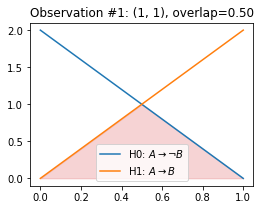

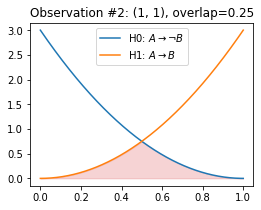

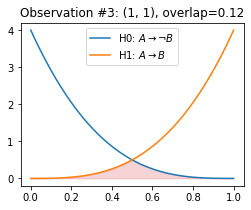

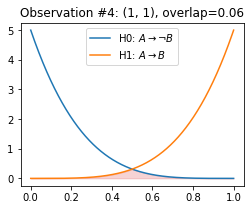

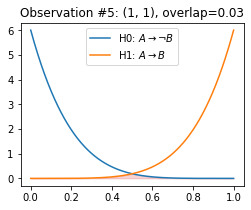

In [8]:
data = ((1,1), (1,1), (1,1), (1,1), (1,1))
simple_implication(data)

### Latent inhibition (Habituation?)

In [9]:
# (A,B) observations
data = ((0,1), (0,1), (0,1), (0,1), (0,1), (1,1), (1,1), (1,1), (1,1), (1,1))
#data = ((1,1), (1,1), (1,1), (1,1), (1,1), (1,1), (1,1))

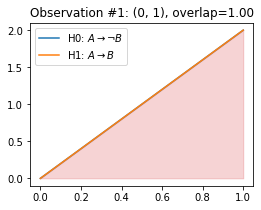

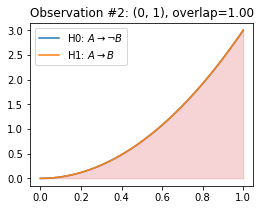

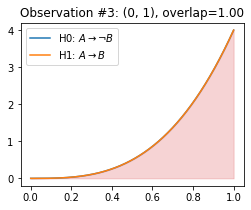

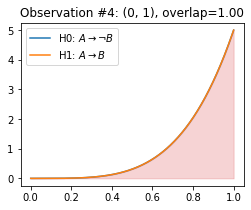

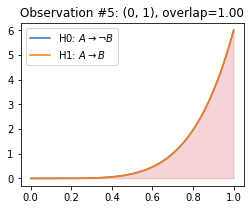

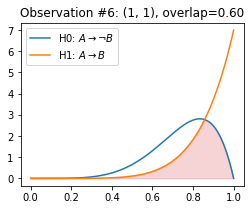

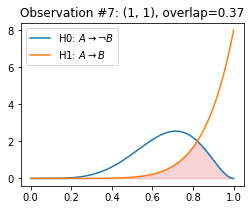

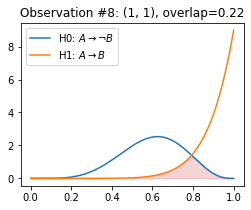

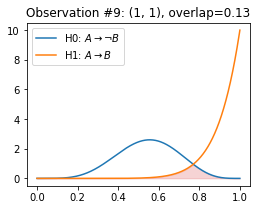

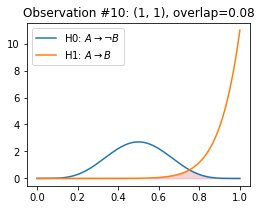

In [10]:
simple_implication(data)

### CS preexposure effect

In [1]:
# (A,B) observations
data = ((1,0), (1,0), (1,0), (1,0), (1,0), (1,1), (1,1), (1,1), (1,1), (1,1), (1,1), (1,1), (1,1), (1,1), (1,1))
#data = ((1,1), (1,1), (1,1), (1,1), (1,1), (1,1), (1,1))

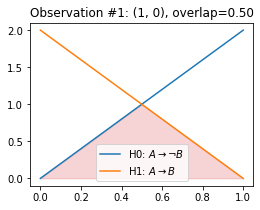

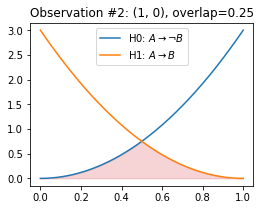

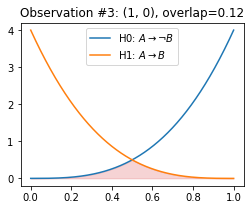

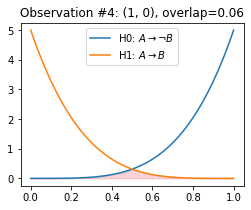

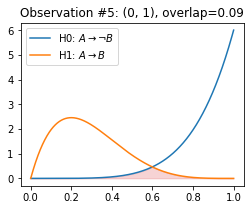

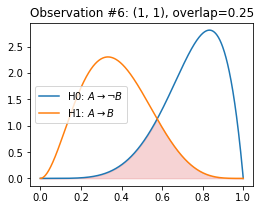

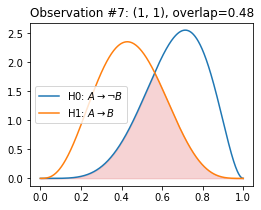

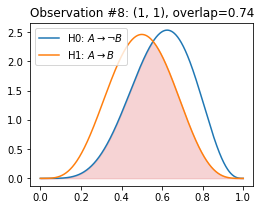

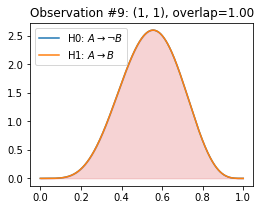

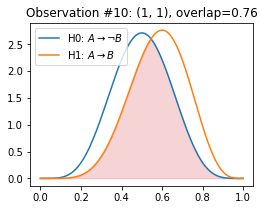

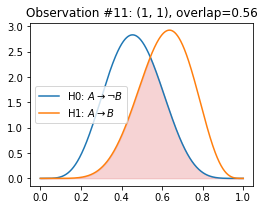

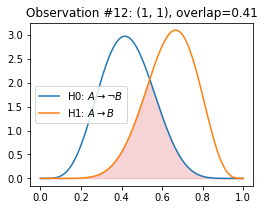

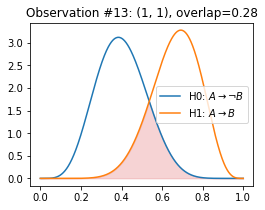

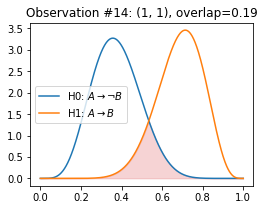

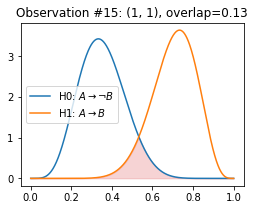

In [88]:
simple_implication(data)

## Equivalence : A <--> B (et sa négation)  

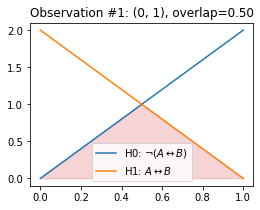

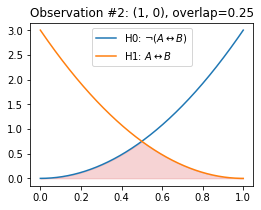

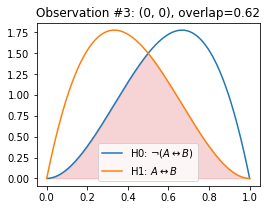

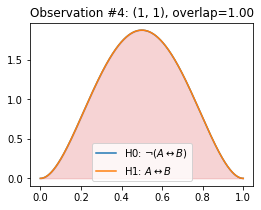

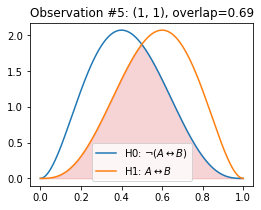

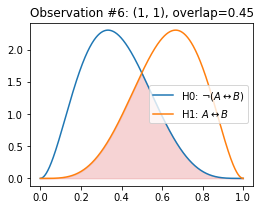

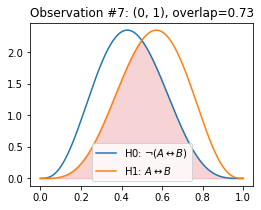

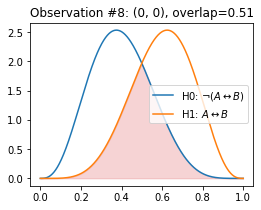

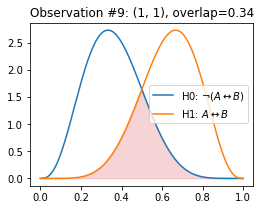

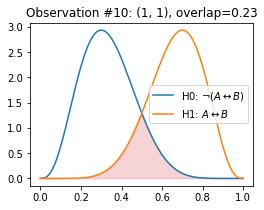

In [34]:
H0 = ((0,1), (1,0))
#H0 = ((1,0)) #non : A --> B
H1 = ((0,0), (1,1)) # A --> nB
beta_ = {'H0':[1,1], 'H1':[1,1]}
for i, obs in enumerate(data):
    if obs in H0:
        beta_['H0'][0] += 1
    else:
        beta_['H0'][1] += 1
    if obs in H1:
        beta_['H1'][0] += 1
    else:
        beta_['H1'][1] += 1
    pdf_H0 = beta.pdf(x, beta_['H0'][0], beta_['H0'][1])
    pdf_H1 = beta.pdf(x, beta_['H1'][0], beta_['H1'][1])
    plt.figure(figsize=(4,3))
    plt.plot(x, pdf_H0, label=r'H0: $\neg (A \leftrightarrow B)$')
    plt.plot(x, pdf_H1, label=r'H1: $A \leftrightarrow B$')
    overlap_surface = np.minimum(pdf_H0, pdf_H1)
    overlap_prob = np.trapz(np.minimum(pdf_H0, pdf_H1), x)
    plt.fill_between(x, np.zeros_like(overlap_surface), overlap_surface, color='tab:red', alpha=.2)
    plt.title(f'Observation #{i+1}: {obs}, overlap={overlap_prob:.2f}')
    plt.legend()

    

## Cue competition : A, X, --> B

  * H0 : non(A --> B) ou non(X --> B) : (A et non-B) ou (X et non-B)
  * H1 : A --> B et X --> B : (non-A ou B) et (non-X ou B) : (non-A et non-X) ou (non-A et B) ou (B et non-X) ou B   
                                                           : (non-A et non-X) ou B 
  * H0 : (A ou X) --> non-B : non(A ou X) ou non-B : (non-A et non-X) ou non-B
  * H1 : (A ou X) --> B : non(A ou X) ou B : (non-A et non-X) ou B
 


In [62]:
data = ((1,1,1), (1,1,1), (1,1,1), (1,1,1), (1,1,1), (1,0,0), (1,0,0), (1,0,0), (1,0,0), (1,0,0))

In [63]:
#H0 = ((1,0,0), (1,1,0),
#      (0,1,0))

#H1 = ((0,0,0), (0,0,1), 
#      (0,1,1),(1,0,1), (1,1,1))

In [67]:
H0 = ((0,0,0), (0,0,1),
      (0,1,0),(1,0,0),(1,1,0))

H1 = ((0,0,0), (0,0,1), 
      (0,1,1),(1,0,1), (1,1,1))

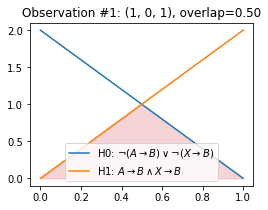

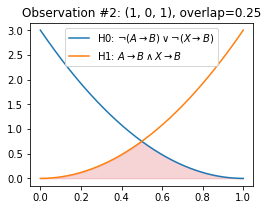

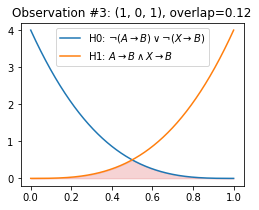

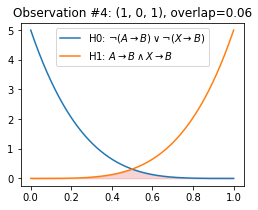

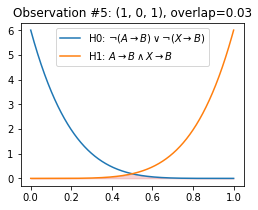

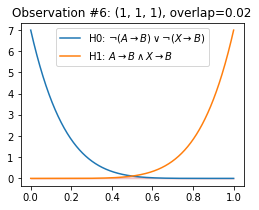

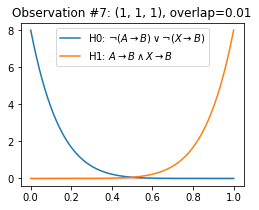

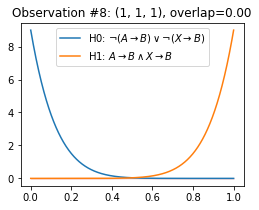

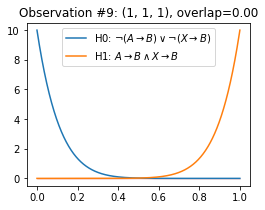

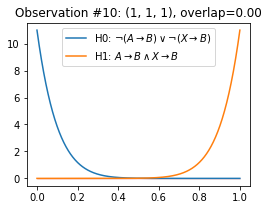

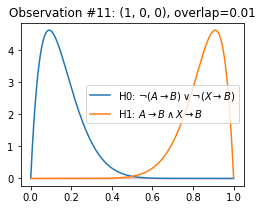

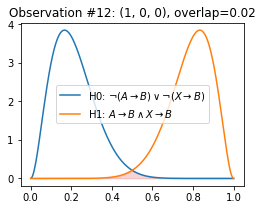

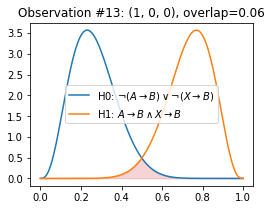

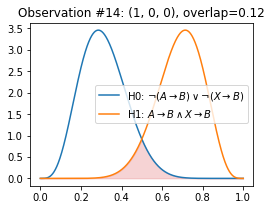

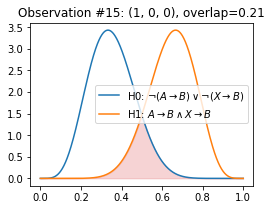

In [68]:
beta_ = {'H0':[1,1], 'H1':[1,1]}
for i, obs in enumerate(data):
    if obs in H0:
        beta_['H0'][0] += 1
    else:
        beta_['H0'][1] += 1
    if obs in H1:
        beta_['H1'][0] += 1
    else:
        beta_['H1'][1] += 1
    pdf_H0 = beta.pdf(x, beta_['H0'][0], beta_['H0'][1])
    pdf_H1 = beta.pdf(x, beta_['H1'][0], beta_['H1'][1])
    plt.figure(figsize=(4,3))
    plt.plot(x, pdf_H0, label=r'H0: $\neg (A \rightarrow B) \vee \neg (X \rightarrow B)$')
    plt.plot(x, pdf_H1, label=r'H1: $A \rightarrow B \wedge X \rightarrow B$')
    overlap_surface = np.minimum(pdf_H0, pdf_H1)
    overlap_prob = np.trapz(np.minimum(pdf_H0, pdf_H1), x)
    plt.fill_between(x, np.zeros_like(overlap_surface), overlap_surface, color='tab:red', alpha=.2)
    plt.title(f'Observation #{i+1}: {obs}, overlap={overlap_prob:.2f}')
    plt.legend()

### inversion H0 : indéfini; H1 et H2 : cue separation

  * H0 : (A ou X) --> B # plus général (mpins spécifique)
  * H1 : A --> B
  * H2 : X --> B
  

In [70]:
data = ((1,1,1), (1,1,1), (1,1,1), (1,1,1), (1,1,1), (1,0,0), (1,0,0), (1,0,0), (1,0,0), (1,0,0))

In [71]:
H0 = ((0,0,0), (0,0,1), 
      (0,1,1),(1,0,1), (1,1,1))
H1 = ((0,0,0), (0,1,0), (0,0,1), (0,1,1),
      (1,0,1), (1,1,1))
H2 = ((0,0,0), (1,0,0), (0,0,1), (1,0,1),
      (0,1,1), (1,1,1))

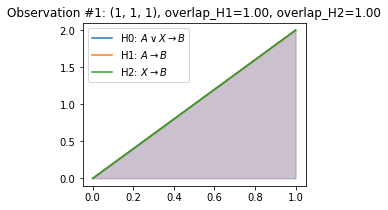

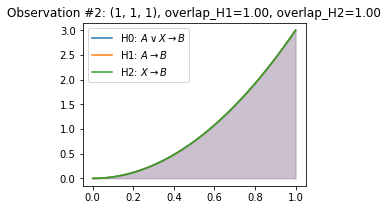

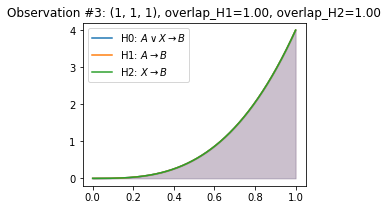

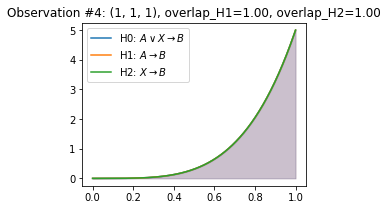

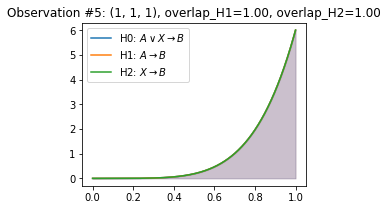

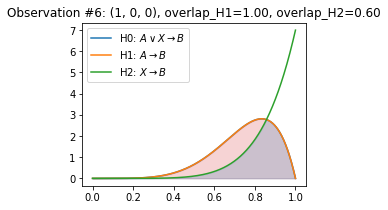

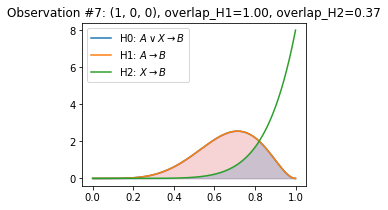

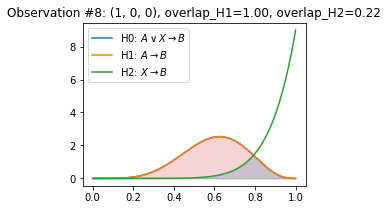

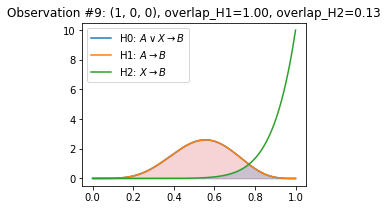

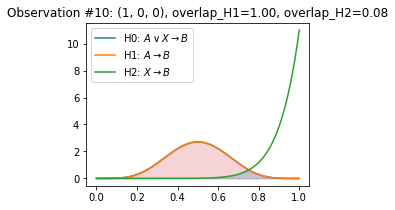

In [72]:

beta_ = {'H0':[1,1], 'H1':[1,1], 'H2':[1,1]}
for i, obs in enumerate(data):
    if obs in H0:
        beta_['H0'][0] += 1
    else:
        beta_['H0'][1] += 1
    if obs in H1:
        beta_['H1'][0] += 1
    else:
        beta_['H1'][1] += 1
    if obs in H2:
        beta_['H2'][0] += 1
    else:
        beta_['H2'][1] += 1
    pdf_H0 = beta.pdf(x, beta_['H0'][0], beta_['H0'][1])
    pdf_H1 = beta.pdf(x, beta_['H1'][0], beta_['H1'][1])
    pdf_H2 = beta.pdf(x, beta_['H2'][0], beta_['H2'][1])
    plt.figure(figsize=(4,3))
    plt.plot(x, pdf_H0, label=r'H0: $A \vee X \rightarrow B$')
    plt.plot(x, pdf_H1, label=r'H1: $A \rightarrow B$')
    plt.plot(x, pdf_H2, label=r'H2: $X \rightarrow B$')
    overlap_surface_1 = np.minimum(pdf_H0, pdf_H1)
    overlap_prob_1 = np.trapz(np.minimum(pdf_H0, pdf_H1), x)
    overlap_surface_2 = np.minimum(pdf_H0, pdf_H2)
    overlap_prob_2 = np.trapz(np.minimum(pdf_H0, pdf_H2), x)
    plt.fill_between(x, np.zeros_like(overlap_surface_1), overlap_surface_1, color='tab:red', alpha=.2)
    plt.fill_between(x, np.zeros_like(overlap_surface_2), overlap_surface_2, color='tab:blue', alpha=.2)
    plt.title(f'Observation #{i+1}: {obs}, overlap_H1={overlap_prob_1:.2f}, overlap_H2={overlap_prob_2:.2f}')
    plt.legend()

    

 
  * H0 : (A ou X) --> B
  

## Retrospective reevaluation : A, X, --> B

  * H0 : A --> B : (non-A ou B) 
  * H1 : X --> B : (non-X ou B) 

In [57]:
data = ((1,0,1), (1,0,1), (1,0,1), (1,0,1), (1,0,1), (1,1,1), (1,1,1), (1,1,1), (1,1,1), (1,1,1), (1,0,0), (1,0,0), (1,0,0), (1,0,0), (1,0,0))


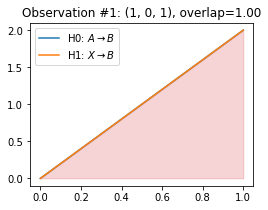

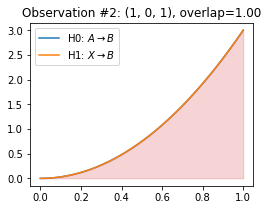

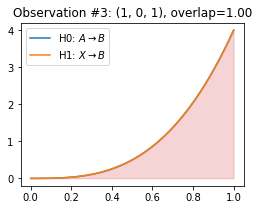

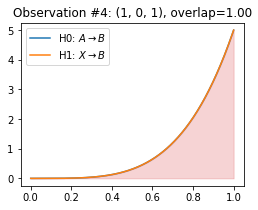

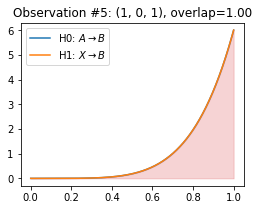

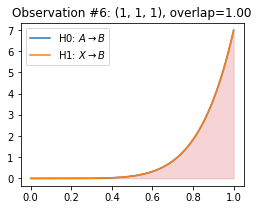

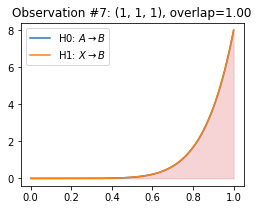

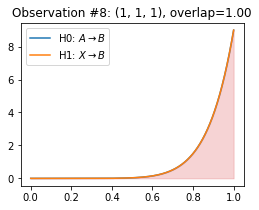

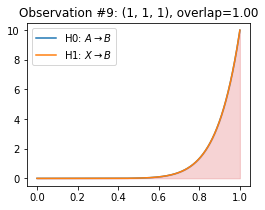

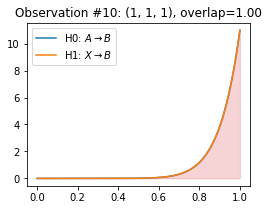

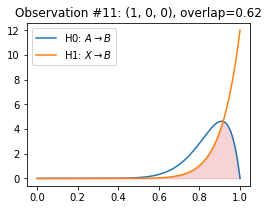

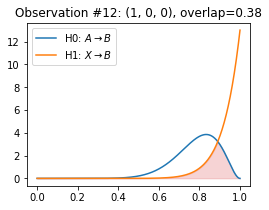

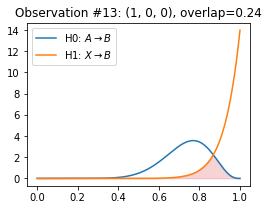

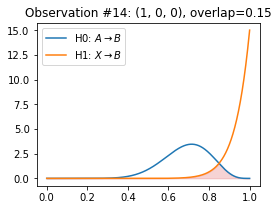

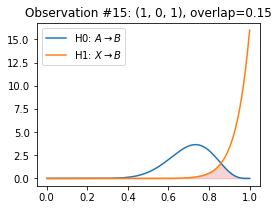

In [60]:
H0 = ((0,0,0), (0,0,1), (0,1,0), (0,1,1),
      (1,0,0), (1,0,1), (1,1,1))

# non-A ou B
H0 = ((0,0,0), (0,1,0), (0,0,1), (0,1,1),
      (1,0,1), (1,1,1))
      
#H0 = ((1,0)) #non : A --> B

# non-X ou B
H1 = ((0,0,0), (1,0,0), (0,0,1), (1,0,1),
      (0,1,1), (1,1,1))
beta_ = {'H0':[1,1], 'H1':[1,1]}
for i, obs in enumerate(data):
    if obs in H0:
        beta_['H0'][0] += 1
    else:
        beta_['H0'][1] += 1
    if obs in H1:
        beta_['H1'][0] += 1
    else:
        beta_['H1'][1] += 1
    pdf_H0 = beta.pdf(x, beta_['H0'][0], beta_['H0'][1])
    pdf_H1 = beta.pdf(x, beta_['H1'][0], beta_['H1'][1])
    plt.figure(figsize=(4,3))
    plt.plot(x, pdf_H0, label=r'H0: $A \rightarrow B$')
    plt.plot(x, pdf_H1, label=r'H1: $X \rightarrow B$')
    overlap_surface = np.minimum(pdf_H0, pdf_H1)
    overlap_prob = np.trapz(np.minimum(pdf_H0, pdf_H1), x)
    plt.fill_between(x, np.zeros_like(overlap_surface), overlap_surface, color='tab:red', alpha=.2)
    plt.title(f'Observation #{i+1}: {obs}, overlap={overlap_prob:.2f}')
    plt.legend()

    

## Modelling contextual effect (Renewal)

H0 = A --> B = non-A ou B 

H1 = C1 --> (A --> B) = C1 --> non-A ou B = non-C1 ou (non-A ou B) 

H2 = C2 --> (A --> non-B) = C2 --> non-A ou non-B = non-C2 ou (non-A ou non-B) 

In [40]:
# (C1, C2, A, B) observations
data = ((1,0,1,1), (1,0,1,1), (1,0,1,1), (1,0,1,1), (1,0,1,1), (0,1,1,0), (0,1,1,0), (0,1,1,0), (0,1,1,0), (0,1,1,0))
#data = ((1,1), (1,1), (1,1), (1,1), (1,1), (1,1), (1,1))

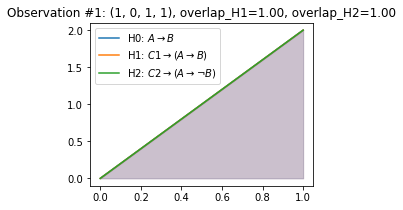

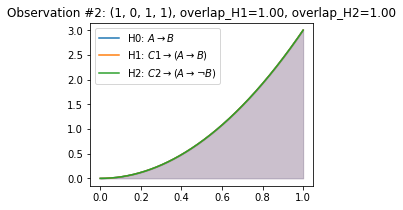

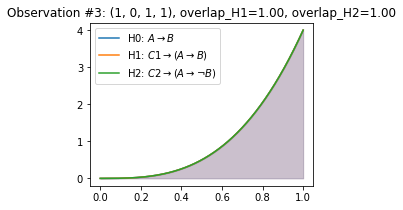

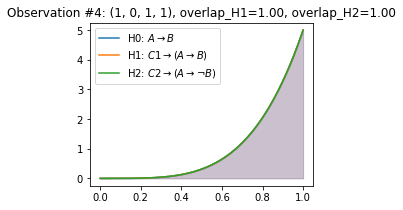

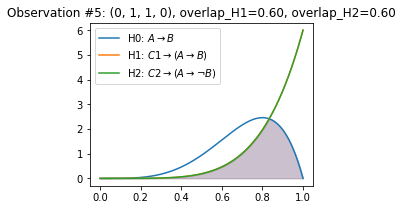

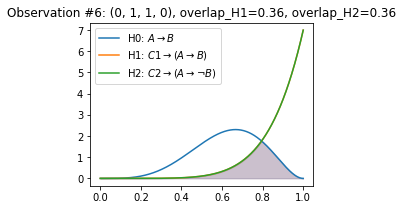

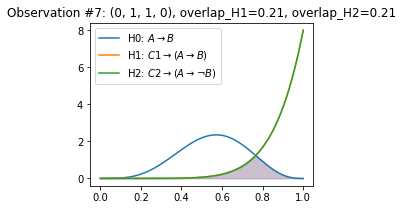

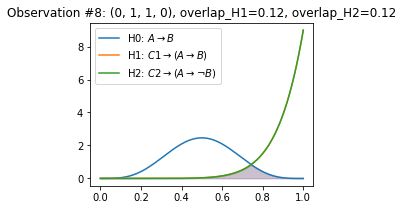

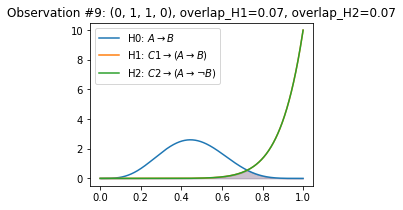

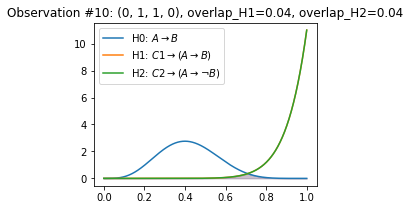

In [42]:
H0 = ((0,0,0,0), (0,0,0,1), (0,0,1,1),
      (0,1,0,0), (0,1,0,1), (0,1,1,1),
      (1,0,0,0), (1,0,0,1), (1,0,1,1),
      (1,1,0,0), (1,1,0,1), (1,1,1,1),)
#H0 = ((1,0)) #non : A --> B
H1 = ((0,0,0,0), (0,0,0,1), (0,0,1,0), (0,0,1,1),
      (0,1,0,0), (0,1,0,1), (0,1,1,0), (0,1,1,1),
      (1,0,0,0), (1,0,0,1), (1,0,1,1),
      (1,1,0,0), (1,1,0,1), (1,1,1,1))
H2 = ((0,0,0,0), (0,0,0,1), (0,0,1,0), (0,0,1,0),
      (1,0,0,0), (1,0,0,1), (1,0,1,0), (1,0,1,1),
      (0,1,0,0), (0,1,0,1), (0,1,1,0),
      (1,1,0,0), (1,1,0,1), (1,1,1,0))
beta_ = {'H0':[1,1], 'H1':[1,1], 'H2':[1,1]}
for i, obs in enumerate(data):
    if obs in H0:
        beta_['H0'][0] += 1
    else:
        beta_['H0'][1] += 1
    if obs in H1:
        beta_['H1'][0] += 1
    else:
        beta_['H1'][1] += 1
    if obs in H2:
        beta_['H2'][0] += 1
    else:
        beta_['H2'][1] += 1
    pdf_H0 = beta.pdf(x, beta_['H0'][0], beta_['H0'][1])
    pdf_H1 = beta.pdf(x, beta_['H1'][0], beta_['H1'][1])
    pdf_H2 = beta.pdf(x, beta_['H2'][0], beta_['H2'][1])
    plt.figure(figsize=(4,3))
    plt.plot(x, pdf_H0, label=r'H0: $A \rightarrow B$')
    plt.plot(x, pdf_H1, label=r'H1: $C1 \rightarrow (A \rightarrow B)$')
    plt.plot(x, pdf_H2, label=r'H2: $C2 \rightarrow (A \rightarrow \neg B)$')
    overlap_surface_1 = np.minimum(pdf_H0, pdf_H1)
    overlap_prob_1 = np.trapz(np.minimum(pdf_H0, pdf_H1), x)
    overlap_surface_2 = np.minimum(pdf_H0, pdf_H2)
    overlap_prob_2 = np.trapz(np.minimum(pdf_H0, pdf_H2), x)
    plt.fill_between(x, np.zeros_like(overlap_surface_1), overlap_surface_1, color='tab:red', alpha=.2)
    plt.fill_between(x, np.zeros_like(overlap_surface_2), overlap_surface_2, color='tab:blue', alpha=.2)
    plt.title(f'Observation #{i+1}: {obs}, overlap_H1={overlap_prob_1:.2f}, overlap_H2={overlap_prob_2:.2f}')
    plt.legend()

    